<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/Cifar10/captain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
## Data description links
# https://www.cs.toronto.edu/~kriz/cifar.html

labels = ['airplane', 'automobile', 'bird', 'car', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
print(len(labels))

10


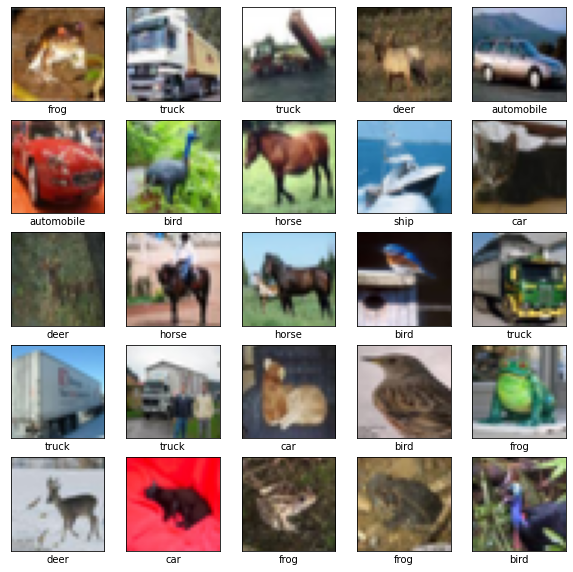

In [7]:
## Here is data is chanelized with 3 channel
# Let's print some of the image from datasets

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [8]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [9]:
## Normalizing the image to 0-1 values
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train[0][0][0] ## Here first is red, green and blue values

array([0.23137255, 0.24313725, 0.24705882])

In [11]:
X_train[0].shape


(32, 32, 3)

In [21]:
def graph(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['Accuracy', 'Val-accuracy'])
  plt.title('accracy score')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['loss', 'Val-loss'])
  plt.title('loss score')
  plt.show()


In [38]:
## Let's try with ANN

model = models.Sequential([
                        ## ====================
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu' ,padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu', padding='same'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.2),

                        ## ====================
                        layers.Conv2D(64, (3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(64, (3, 3) , activation='relu', padding='same'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.3),

                        layers.Conv2D(128,(3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(128,(3, 3) , activation='relu', padding='same'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.4),

                        layers.Flatten(),
                        layers.Dense(256, activation = 'relu'),
                        layers.Dense(128, activation = 'relu'),
                        layers.Dense(10, activation = 'softmax')
])


In [39]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)      

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train, y_train, batch_size = 62, validation_data = (X_test, y_test), epochs = 30)

Epoch 1/30
807/807 [==============================] - 9s 10ms/step - loss: 1.3847 - accuracy: 0.4990 - val_loss: 1.1854 - val_accuracy: 0.5856
Epoch 2/30
807/807 [==============================] - 8s 9ms/step - loss: 0.9573 - accuracy: 0.6625 - val_loss: 0.8905 - val_accuracy: 0.6936
Epoch 3/30
807/807 [==============================] - 7s 9ms/step - loss: 0.8127 - accuracy: 0.7142 - val_loss: 0.7844 - val_accuracy: 0.7223
Epoch 4/30
807/807 [==============================] - 7s 9ms/step - loss: 0.7208 - accuracy: 0.7503 - val_loss: 0.7579 - val_accuracy: 0.7419
Epoch 5/30
807/807 [==============================] - 7s 9ms/step - loss: 0.6575 - accuracy: 0.7711 - val_loss: 0.6356 - val_accuracy: 0.7798
Epoch 6/30
807/807 [==============================] - 7s 9ms/step - loss: 0.6052 - accuracy: 0.7913 - val_loss: 0.6296 - val_accuracy: 0.7891
Epoch 7/30
807/807 [==============================] - 7s 9ms/step - loss: 0.5647 - accuracy: 0.8047 - val_loss: 0.6147 - val_accuracy: 0.7937
Epoch

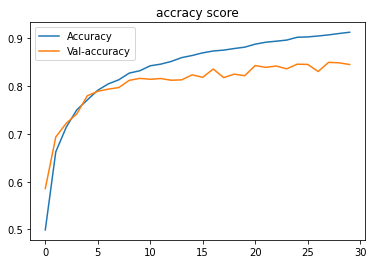

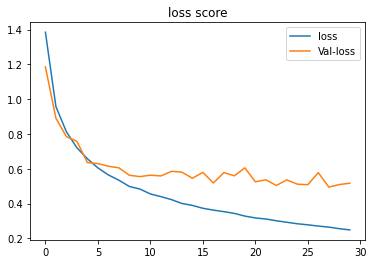

In [42]:
graph(history)

In [79]:
## Let's try with ANN

model = models.Sequential([
                        ## ====================
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu' ,padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.2),

                        ## ====================
                        layers.Conv2D(64, (3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(64, (3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.3),

                        layers.Conv2D(128,(3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(128,(3, 3) , activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.Conv2D(32, (3, 3), input_shape=X_train[0].shape, activation='relu', padding='same'),
                        layers.BatchNormalization(),
                        layers.MaxPooling2D((2, 2)),
                        layers.Dropout(0.4),

                        layers.Flatten(),
                        layers.Dense(256, activation = 'relu'),
                        layers.Dense(128, activation = 'relu'),
                        layers.Dense(10, activation = 'softmax')
])


In [80]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 100)

Epoch 1/100
782/782 [==============================] - 12s 14ms/step - loss: 1.4520 - accuracy: 0.4708 - val_loss: 1.2461 - val_accuracy: 0.5666
Epoch 2/100
782/782 [==============================] - 10s 13ms/step - loss: 1.0283 - accuracy: 0.6331 - val_loss: 0.9312 - val_accuracy: 0.6711
Epoch 3/100
782/782 [==============================] - 10s 13ms/step - loss: 0.8501 - accuracy: 0.7007 - val_loss: 0.8661 - val_accuracy: 0.6992
Epoch 4/100
782/782 [==============================] - 10s 13ms/step - loss: 0.7542 - accuracy: 0.7335 - val_loss: 0.7199 - val_accuracy: 0.7501
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6744 - accuracy: 0.7634 - val_loss: 0.7142 - val_accuracy: 0.7506
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 0.6220 - accuracy: 0.7833 - val_loss: 0.6123 - val_accuracy: 0.7941
Epoch 7/100
782/782 [==============================] - 10s 13ms/step - loss: 0.5761 - accuracy: 0.8004 - val_loss: 0.6388 - val_ac

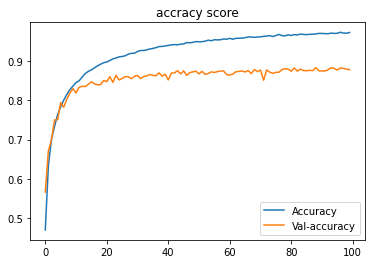

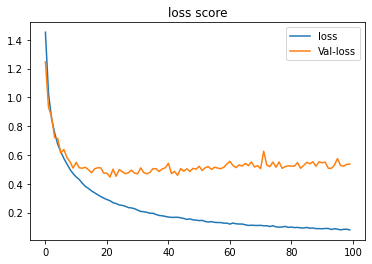

In [82]:
graph(history)